<a href="https://colab.research.google.com/github/AbuKaisar24/Bengali-Text-Generation-Using-Bi-directional-RNN/blob/master/Bengali_Text_Generation_Using_Bidirectional_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
df = pd.read_excel("gdrive/My Drive/Colab Notebooks/newdata.xlsx",encoding='utf-8')

In [0]:
df.head()
df=df.drop("Post Type",axis=1)

In [0]:
df.shape

(20, 2)

In [0]:
df.isnull().sum()

Text       0
Summary    0
dtype: int64

In [0]:
for i in range(15,20):
    print("News:",i+1)
    print("Text:",df.Text[i])
    print("Summary:",df.Summary[i])

News: 16
Text: প্রয়োজন সবার আগে উচ্চ গতি সম্পন্ন, নিরবিচ্ছিন্ন ইন্টারনেট।প্রত্যেকটি ডিজিটাল সেন্টারে উচ্চ গতি সম্পন্ন, নিরবিচ্ছিন্ন ইন্টারনেট কানেকশনের মাধ্যমে এলাকা ভিত্তিক উদ্যোক্তাসহ আরো শত শত তরুন তরুণীর কর্মসংস্থা্র ব্যবস্থা হবে। ডিজিটাল সেন্টার উদ্যোক্তা সম্মেলনে প্রতিমন্ত্রী জুনাইদ আহমেদ পলক।
Summary: শত শত তরুন তরুণীর কর্মসংস্থা্র ব্যবস্থা হবে।
News: 17
Text: আমি এটুকুই চাইব এই অবহেলিত জনগোষ্ঠী যেন আর অবহেলার শিকার না হয়। - প্রধানমন্ত্রী শেখ হাসিনা পর্যায়ক্রমে দেশের আটটি বিভাগীয় শহরে বৃহৎ পরিসরে পিতামাতা ও অভিভাবকহীন নিউরো-ডেভেলপমেন্টাল প্রতিবন্ধী মেয়েদের জন্য পরিচর্যা কেন্দ্র স্থাপন করা হবে। এসব কেন্দ্রে তাদের শিক্ষা, প্রশিক্ষণ, চিকিৎসা, খেলাধুলাসহ সব সুবিধা অন্তর্ভুক্ত থাকবে।
Summary: প্রতিবন্ধী মেয়েদের জন্য পরিচর্যা কেন্দ্র স্থাপন করা হবে।
News: 18
Text: ১৯৭৫ সালের ৪ এপ্রিল দুই মার্কিন কম্পিউটার প্রকৌশলী বিল গেটস এবং পল অ্যালেনের উদ্যোগে প্রতিষ্ঠিত হয় মাইক্রোসফট। মূলত নিজেদের তৈরি কম্পিউটার প্রোগ্রাম বিক্রির জন্যই যৌথভাবে প্রতিষ্ঠান খুলে বসেন গেটস ও অ্যালেন।
Summary: বিল গেট

In [0]:

contractions = { 
"বি.দ্র ": "বিশেষ দ্রষ্টব্য",
"ড.": "ডক্টর",
"ডা.": "ডাক্তার",
"ইঞ্জি:": "ইঞ্জিনিয়ার",
"রেজি:": "রেজিস্ট্রেশন",
"মি.": "মিস্টার",
"মু.": "মুহাম্মদ",
"মো.": "মোহাম্মদ",
}

In [0]:
import re
import string
def clean_text(text,remove_stopwords = False):
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    # Format words and remove unwanted characters
    whitespace = re.compile(u"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a]+", re.UNICODE)
    bangla_digits = u"[\u09E6\u09E7\u09E8\u09E9\u09EA\u09EB\u09EC\u09ED\u09EE\u09EF]+"
    english_chars = u"[a-zA-Z0-9]"
    punc = u"[(),$%^&*+={}\[\]:\"|\'\~`<>/,¦!?½£¶¼©⅐⅑⅒⅓⅔⅕⅖⅗⅘⅙⅚⅛⅜⅝⅞⅟↉¤¿º;-]+"
    bangla_fullstop = u"\u0964"     #bangla fullstop(dari)
    punctSeq   = u"['\"“”‘’]+|[.?!,…]+|[:;]+"
    
    text = re.sub(bangla_digits, " ", text)
    text = re.sub(punc, " ", text)
    text = re.sub(english_chars, " ", text)
    text = re.sub(bangla_fullstop, " ", text)
    text = re.sub(punctSeq, " ", text)
    text = whitespace.sub(" ", text).strip()
    
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;‘:‘ ’', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]। ,', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    text = re.sub(r"[\@$#%~+-\.\'।\"]"," ",text)
    text = re.sub(r"(?m)^\s+", "", text)
    text = re.sub("[()]","",text)
    text = re.sub("[‘’]","",text)
    text = re.sub("[!]","",text)
    text = re.sub("[/]","",text)
    text = re.sub("[:]","",text)
    text= re.sub('\ |\?|\.|\!|\/|\;|\:', ' ',text)
    text= text.strip("/")
    
    if remove_stopwords:
        k = []
        with open('gdrive/My Drive/Colab Notebooks/Banglastopword.txt', 'r',encoding="utf-8") as f:
            for word in f:
                word = word.split()
                k.append(word[0])
            text = [t for t in text if t not in k]
            text = "".join(text)
            
    return text

In [0]:
clean_summaries = []
for summary in df.Summary:
    clean_summaries.append(clean_text(summary,remove_stopwords=False))
print("Summaries are complete.")

clean_texts = []
for text in df.Text:
    clean_texts.append(clean_text(text))
print("Texts are complete.")

total=clean_texts+clean_summaries 
print(total)

Summaries are complete.
Texts are complete.
['আগে যখন আমি ফুটবল বুঝতাম না ও দেখতাম না তখন ভাবতাম মেসিই সেরা তারপর যখন আমি ফুটবল বোঝা ও দেখা শুরু করলাম তখন উপলব্ধি করলাম যে আগে আমি ভুল ছিলাম না', 'অগ্নিকান্ডের সময় আমাদের করণীয় তো আমরা সবাই জানি কিন্তু আমরা কি জানি যেকোনো অগ্নিকান্ডের সময় দুর্ঘটনাস্থলে উপস্থিত থাকা সাধারণ জনগনের করণীয় কি চলুন জেনে নেই দুর্ঘটনাস্থলে উপস্থিত থাকা সাধারণ জনগনের করণীয়গুলো প্রয়োজনীয় কিছু পদক্ষেপ গ্রহন করে মূল্যবান জীবন বাঁচাই', 'ড্যাফোডিলের মেইন ক্যাম্পাসটারে ধানমন্ডি থেইকা গাবতলী ট্রান্সফারের জন্য একটা সিরিয়াস আন্দোলন দরকার সেমিস্টার যাবত এই জ্যামের জন্য ঃ টার একটা ক্লাস ও করতে পারি না মজার রোড থেইক্কা কল্যাণপুর আসতেই লাগলো ঘণ্টা এতো সুন্দর জীবন দিয়া কি করবো যদি এক্সাম মিস হয়', 'পাইপ বয় নাঈমকে খালেদা জিয়ার বিরুদ্ধে কথাটি শিখিয়ে দেয়া হয়েছে দাবী তার মায়ের বললেন ডলার পুরস্কার ঘোষনাকারী সামী তবে নাঈম তার ভুল বুঝতে পারায় শেষ পর্যন্ত টাকা দেয়া হচ্ছে তাকে', 'সাংবাদিক উজ্জ্বল সে একজন প্রতারক সামন্য অর্থের প্রয়োজনে সে মানুষের বিরুদ্বে বিমাতা স্বরুপ মিথ্যা ভুল সংবাদ প

In [0]:
corpus = total
print(corpus[:17])

['আগে যখন আমি ফুটবল বুঝতাম না ও দেখতাম না তখন ভাবতাম মেসিই সেরা তারপর যখন আমি ফুটবল বোঝা ও দেখা শুরু করলাম তখন উপলব্ধি করলাম যে আগে আমি ভুল ছিলাম না', 'অগ্নিকান্ডের সময় আমাদের করণীয় তো আমরা সবাই জানি কিন্তু আমরা কি জানি যেকোনো অগ্নিকান্ডের সময় দুর্ঘটনাস্থলে উপস্থিত থাকা সাধারণ জনগনের করণীয় কি চলুন জেনে নেই দুর্ঘটনাস্থলে উপস্থিত থাকা সাধারণ জনগনের করণীয়গুলো প্রয়োজনীয় কিছু পদক্ষেপ গ্রহন করে মূল্যবান জীবন বাঁচাই', 'ড্যাফোডিলের মেইন ক্যাম্পাসটারে ধানমন্ডি থেইকা গাবতলী ট্রান্সফারের জন্য একটা সিরিয়াস আন্দোলন দরকার সেমিস্টার যাবত এই জ্যামের জন্য ঃ টার একটা ক্লাস ও করতে পারি না মজার রোড থেইক্কা কল্যাণপুর আসতেই লাগলো ঘণ্টা এতো সুন্দর জীবন দিয়া কি করবো যদি এক্সাম মিস হয়', 'পাইপ বয় নাঈমকে খালেদা জিয়ার বিরুদ্ধে কথাটি শিখিয়ে দেয়া হয়েছে দাবী তার মায়ের বললেন ডলার পুরস্কার ঘোষনাকারী সামী তবে নাঈম তার ভুল বুঝতে পারায় শেষ পর্যন্ত টাকা দেয়া হচ্ছে তাকে', 'সাংবাদিক উজ্জ্বল সে একজন প্রতারক সামন্য অর্থের প্রয়োজনে সে মানুষের বিরুদ্বে বিমাতা স্বরুপ মিথ্যা ভুল সংবাদ প্রচার করে মানুষের সম্মান হানি করে এই ধরনের স

In [0]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Flatten, Bidirectional, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import text_to_word_sequence
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.models import Model
from keras.models import model_from_json
import keras.utils as ku 
import keras

from tensorflow import set_random_seed
import tensorflow as tf
from numpy.random import seed
set_random_seed(2)
seed(1)

import pandas as pd
import numpy as np
import string, os 
import collections
import random

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

Using TensorFlow backend.


In [0]:
embeddings_index = dict()
with open('gdrive/My Drive/Colab Notebooks/bn_w2v_model.text', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype = 'float32')
        embeddings_index[word] = vector

In [0]:
embedding_size = len(embeddings_index['জাতীয়'])
embedding_size

300

In [0]:
def mapToFlattenList(token_list):
    flatten_list = []
    for token in token_list:
        if token in embeddings_index:
            flatten_list += list(embeddings_index[token])
        else:
            flatten_list += [0] * embedding_size
    return flatten_list

In [0]:
max_n_gram = 10
tokenizer = Tokenizer()
def get_sequence_of_tokens(corpus):
    tokenizer.fit_on_texts(corpus)
    total_words = len(tokenizer.word_index) + 1
    
    input_sequences = []
    for line in corpus:
        token_list = text_to_word_sequence(line)
        for i in range(1, len(token_list)):
            n_gram_sequence = mapToFlattenList(token_list[max(i-max_n_gram,0):i])
            input_sequences.append(n_gram_sequence+tokenizer.texts_to_sequences([token_list[i]])[0])
    return input_sequences, total_words

In [0]:
inp_sequences, total_words = get_sequence_of_tokens(corpus)

In [0]:
inp_sequences[:5]

[[-0.084042,
  0.022613,
  0.046425,
  0.025482,
  -0.0484,
  0.138422,
  0.020416,
  0.164858,
  -0.110694,
  -0.143809,
  -0.105051,
  -0.017098,
  -0.007612,
  0.194794,
  -0.023219,
  -0.035482,
  0.180033,
  0.038727,
  0.001802,
  0.219314,
  -0.107781,
  0.052831,
  0.11638,
  -0.079204,
  0.012107,
  0.042475,
  0.032217,
  0.037574,
  0.192508,
  -0.038801,
  -0.071407,
  0.114769,
  -0.000778,
  0.052575,
  -0.171785,
  -0.052257,
  -0.059634,
  -0.179138,
  0.108183,
  0.100829,
  -0.017731,
  -0.135973,
  0.041875,
  -0.060731,
  0.073738,
  0.089658,
  0.04227,
  -0.032167,
  -0.114391,
  0.129775,
  0.063353,
  -0.036509,
  0.051225,
  -0.016103,
  -0.157177,
  0.035035,
  -0.080842,
  0.039266,
  -0.081086,
  -0.024968,
  0.00106,
  0.034732,
  0.099821,
  0.011716,
  0.037911,
  0.00451,
  0.08971,
  0.153763,
  -0.081477,
  0.058223,
  -0.062216,
  0.224443,
  0.110152,
  -0.041689,
  -0.186116,
  0.004459,
  -0.099749,
  -0.026148,
  -0.056937,
  -0.03642,
  0.07453,


In [0]:
def generate_padded_sequences(input_sequences):
    n = len(input_sequences)
    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre',dtype='float'))
    predictors, label = input_sequences[:,:-1].reshape((n, -1 ,embedding_size)),input_sequences[:,-1:]
    return predictors, label, max_sequence_len

predictors, label, max_sequence_len = generate_padded_sequences(inp_sequences)

In [0]:
predictors.shape, label.shape

((723, 10, 300), (723, 1))

In [0]:
def create_model(max_sequence_len, total_words):
    input_len = max_sequence_len - 1
    model = Sequential()
    model.add(Bidirectional(LSTM(units=256,
                activation='relu'), input_shape=predictors[0].shape))
    
    model.add(Dropout(0.4))
    
    model.add(Dense(total_words, activation='softmax'))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy']) 
    return model

model = create_model(max_sequence_len, total_words)
model.summary()

W0720 16:01:06.001200 140347454822272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0720 16:01:06.004358 140347454822272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0720 16:01:06.026586 140347454822272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0720 16:01:06.786603 140347454822272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0720 16:01:06.794764 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 512)               1140736   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 485)               248805    
Total params: 1,389,541
Trainable params: 1,389,541
Non-trainable params: 0
_________________________________________________________________


In [0]:
history=model.fit(predictors, label, epochs=100, verbose=2)

W0720 16:01:08.775262 140347454822272 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
 - 3s - loss: 6.2053 - acc: 0.0083
Epoch 2/100
 - 1s - loss: 6.0441 - acc: 0.0249
Epoch 3/100
 - 1s - loss: 5.7899 - acc: 0.0332
Epoch 4/100
 - 1s - loss: 5.3886 - acc: 0.0526
Epoch 5/100
 - 1s - loss: 4.8781 - acc: 0.1010
Epoch 6/100
 - 1s - loss: 4.2892 - acc: 0.1342
Epoch 7/100
 - 1s - loss: 3.7211 - acc: 0.1798
Epoch 8/100
 - 1s - loss: 3.1696 - acc: 0.2490
Epoch 9/100
 - 1s - loss: 2.6961 - acc: 0.3084
Epoch 10/100
 - 1s - loss: 2.4258 - acc: 0.3098
Epoch 11/100
 - 1s - loss: 2.0951 - acc: 0.3734
Epoch 12/100
 - 1s - loss: 1.7923 - acc: 0.4606
Epoch 13/100
 - 1s - loss: 1.6339 - acc: 0.5242
Epoch 14/100
 - 1s - loss: 1.4826 - acc: 0.5311
Epoch 15/100
 - 1s - loss: 1.3018 - acc: 0.5947
Epoch 16/100
 - 1s - loss: 1.1332 - acc: 0.6279
Epoch 17/100
 - 1s - loss: 1.0595 - acc: 0.6667
Epoch 18/100
 - 1s - loss: 0.9648 - acc: 0.6999
Epoch 19/100
 - 1s - loss: 0.9045 - acc: 0.7095
Epoch 20/100
 - 1s - loss: 0.8229 - acc: 0.7441
Epoch 21/100
 - 1s - loss: 0.7194 - acc: 0.7759
E

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='gdrive/My Drive/Colab Notebooks/recurrent_neural_network.png')

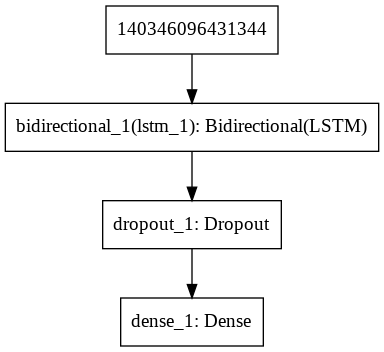

In [0]:
from IPython.display import display, Image
display(Image(filename='gdrive/My Drive/Colab Notebooks/recurrent_neural_network.png'))

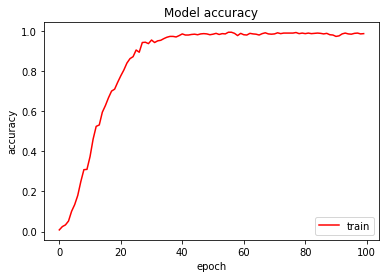

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'],color = 'red')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

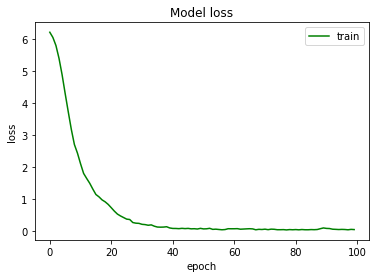

In [0]:
plt.plot(history.history['loss'],color = 'green')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [0]:
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = text_to_word_sequence(seed_text)
        n_gram_sequence = mapToFlattenList(token_list[max(len(token_list)-max_n_gram,0):])
        input_sequences = np.array(pad_sequences([n_gram_sequence], maxlen=max_sequence_len-1, padding='pre',dtype='float'))
        predictor = input_sequences.reshape((1, -1 ,embedding_size))
        predicted = model.predict_classes(predictor, verbose=0)
        output_word = ""
        for word,index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " "+output_word
    return seed_text.title()

In [0]:
generate_text("আগে যখন", 11, model, max_sequence_len)

'আগে যখন আমি ফুটবল বুঝতাম না ও দেখতাম না তখন ভাবতাম মেসিই সেরা'

In [0]:
generate_text("শত",6, model, max_sequence_len)

'শত শত তরুন তরুণীর কর্মসংস্থা্র ব্যবস্থা হবে'

In [0]:
generate_text("ভানুয়াতুতে",3, model, max_sequence_len)

'ভানুয়াতুতে শ্রমিক আটকা পড়েছে'